Total issues scraped: 500
Top 5 Labels:
activerecord     150
docs              97
railties          92
actionpack        39
activesupport     35
Name: count, dtype: int64


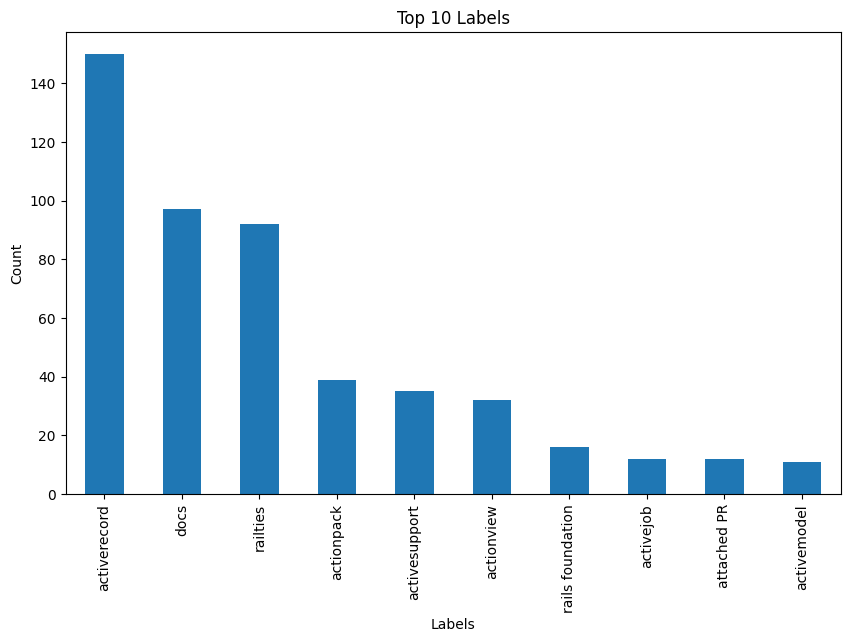

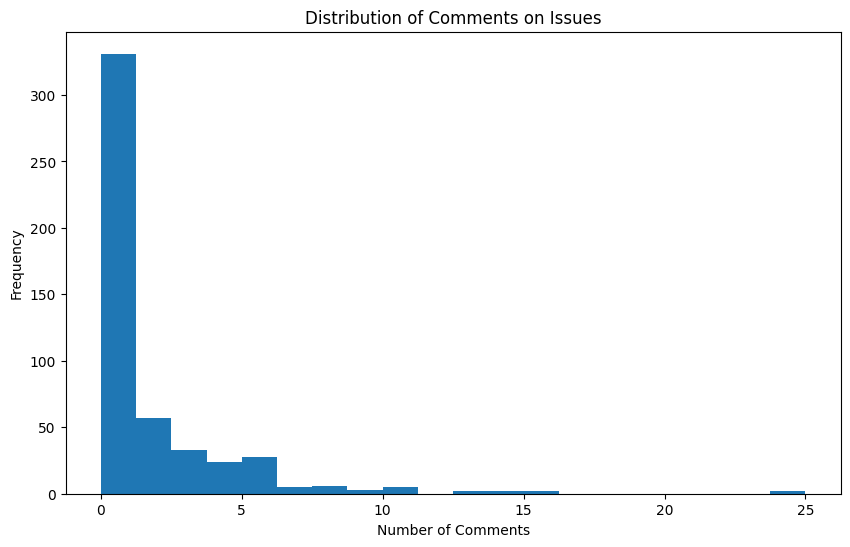

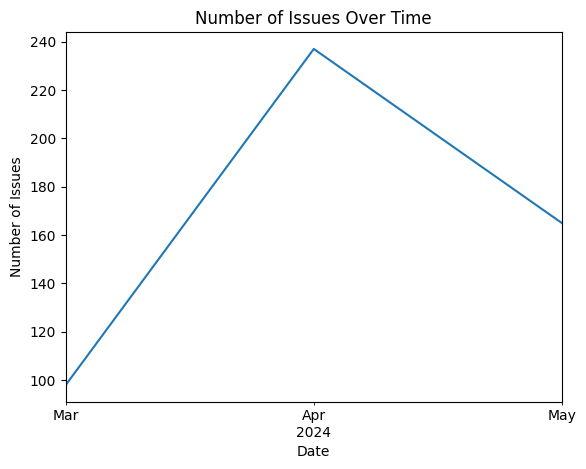

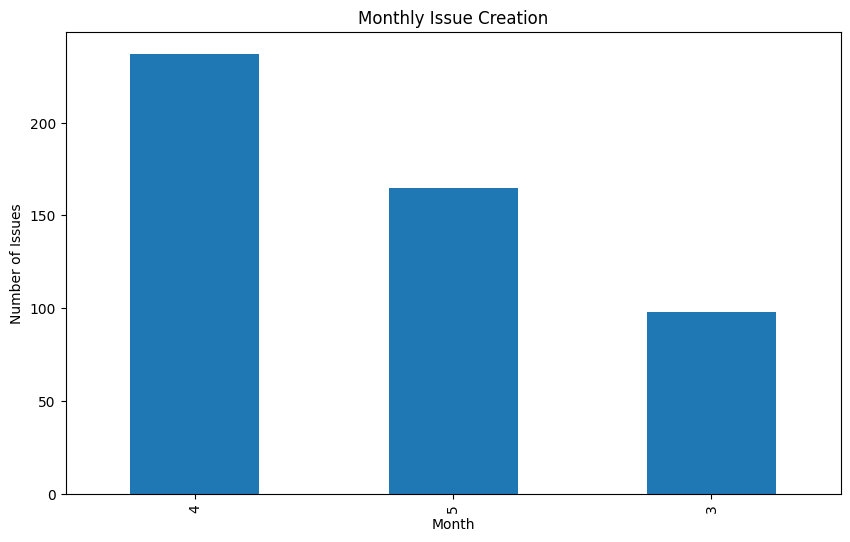

Top Reporters:
reporter
casperisfine      30
fatkodima         24
andrewn617        20
Earlopain         13
akhilgkrishnan    12
Name: count, dtype: int64


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Classified Issues:
Title: chore(deps-dev): update eslint from 4.19.1 to 8.40.0
Predicted Label: actioncable
Confidence Score: 0.21
--------------------------------------------------
Title: Generate Migration - Rename Table
Predicted Label: With reproduction steps
Confidence Score: 0.18
--------------------------------------------------
Title: Fix issue with JSON column default values and add corresponding tests
Predicted Label: needs backport
Confidence Score: 0.24
--------------------------------------------------
Title: Add templates from hidden directories
Predicted Label: With reproduction steps
Confidence Score: 0.20
--------------------------------------------------
Title: More restore original db config in db rake tasks
Predicted Label: more-information-needed
Confidence Score: 0.21
--------------------------------------------------
Title: Production rails server does not boot if skipping action cable in Rails 8.0.0.alpha
Predicted Label: actioncable
Confidence Score: 0.18
-----

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
from transformers import pipeline

# Fetch issues from GitHub API
def fetch_issues():
    issues = []
    url = "https://api.github.com/repos/rails/rails/issues"
    params = {"state": "all", "per_page": 100}
    headers = {"Accept": "application/vnd.github.v3+json"}

    for page in range(1, 6):
        response = requests.get(url, params={**params, "page": page}, headers=headers)
        if response.status_code == 200:
            issues.extend(response.json())
        else:
            print(f"Error fetching issues: {response.status_code}")
            break
    return issues

# Parse fetched issues
def parse_issues(issues):
    parsed_issues = []
    for issue in issues:
        parsed_issue = {
            "number": issue["number"],
            "title": issue["title"],
            "created_at": issue["created_at"],
            "comments": issue["comments"],
            "labels": [label["name"] for label in issue["labels"]],
            "reporter": issue["user"]["login"] if "user" in issue and "login" in issue["user"] else "Unknown",
        }
        parsed_issues.append(parsed_issue)
    return parsed_issues

# Perform exploratory data analysis (EDA)
def perform_eda(issues):
    df = pd.DataFrame(issues)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df.set_index('created_at', inplace=True)

    print(f"Total issues scraped: {len(df)}")

    # Visualize top labels
    all_labels = [label for labels in df['labels'] for label in labels]
    if all_labels:
        label_counts = pd.Series(all_labels).value_counts()
        print("Top 5 Labels:")
        print(label_counts.head(5))
        label_counts.head(10).plot(kind='bar', figsize=(10, 6))
        plt.title('Top 10 Labels')
        plt.xlabel('Labels')
        plt.ylabel('Count')
        plt.show()

    # Visualize distribution of comments
    if 'comments' in df.columns:
        df['comments'].plot(kind='hist', bins=20, figsize=(10, 6))
        plt.title('Distribution of Comments on Issues')
        plt.xlabel('Number of Comments')
        plt.ylabel('Frequency')
        plt.show()

    # Visualize issue creation over time
    issue_over_time = df.resample('M').size()
    issue_over_time.plot()
    plt.title('Number of Issues Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Issues')
    plt.show()

    # Visualize monthly issue creation
    monthly_counts = df.index.month.value_counts()
    monthly_counts.plot(kind='bar', figsize=(10, 6))
    plt.title('Monthly Issue Creation')
    plt.xlabel('Month')
    plt.ylabel('Number of Issues')
    plt.show()

    # Identify top reporters
    if 'reporter' in df.columns:
        top_reporters = df['reporter'].value_counts().head(5)
        print("Top Reporters:")
        print(top_reporters)

# Classify issues using zero-shot classification
def classify_issues(issues):
    classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
    descriptions = [issue['title'] for issue in issues]
    candidate_labels = list(set([label for issue in issues for label in issue['labels']]))
    classifications = classifier(descriptions, candidate_labels=candidate_labels)

    summarized_classifications = []
    for i, classification in enumerate(classifications):
        result = {
            'title': issues[i]['title'],
            'label': classification['labels'][0],
            'score': classification['scores'][0]
        }
        summarized_classifications.append(result)

    return summarized_classifications

# Main function
def main():
    issues = fetch_issues()
    parsed_issues = parse_issues(issues)
    perform_eda(parsed_issues)
    classified_issues = classify_issues(parsed_issues)
    print("Classified Issues:")
    for classified_issue in classified_issues[:10]:  # Display only first 10 for brevity
        print(f"Title: {classified_issue['title']}")
        print(f"Predicted Label: {classified_issue['label']}")
        print(f"Confidence Score: {classified_issue['score']:.2f}")
        print("-" * 50)

if __name__ == "__main__":
    main()